In [90]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [91]:
boston = load_boston()

In [92]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [93]:
Data = pd.DataFrame(boston.data, columns = boston.feature_names)
Data['price']=boston.target
Data.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [94]:
Y=boston.target
X=boston.data
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

In [95]:
print("X Shape: ",X.shape)
print("Y Shape: ",Y.shape)
print("X_Train Shape: ",x_train.shape)
print("X_Test Shape: ",x_test.shape)
print("Y_Train Shape: ",y_train.shape)
print("Y_Test Shape: ",y_test.shape)

X Shape:  (506, 13)
Y Shape:  (506,)
X_Train Shape:  (354, 13)
X_Test Shape:  (152, 13)
Y_Train Shape:  (354,)
Y_Test Shape:  (152,)


In [96]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
stdsc = scaler.fit(x_train)
x_train = stdsc.transform(x_train)
x_test = stdsc.transform(x_test)

In [97]:
## Adding the PRIZE Column in the data
train_data=pd.DataFrame(x_train)
train_data['price']=y_train
train_data.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,price
0,-0.378117,-0.489523,-0.162302,-0.263603,-0.093321,-0.729904,0.098099,0.122029,-0.620473,-0.593789,-0.013123,0.455730,0.446831,19.8
1,0.787100,-0.489523,1.029018,-0.263603,1.193623,-0.633850,0.320428,-1.097451,1.716202,1.580355,0.806667,-0.199615,2.405231,6.3
2,0.804660,-0.489523,1.029018,-0.263603,0.252167,0.712275,0.921811,-0.814272,1.716202,1.580355,0.806667,-3.064996,0.970281,14.1
3,-0.402385,2.963779,-1.111001,-0.263603,-1.354353,-0.723043,-1.381666,1.364873,-0.620473,-0.395594,-1.060632,0.455730,-0.348813,19.4
4,-0.394819,2.963779,-1.323114,-0.263603,-1.224795,-0.518586,-1.804456,3.279484,-0.620473,-0.413611,1.626456,0.223001,-1.000682,20.6


In [98]:
x_test=np.array(x_test)
y_test=np.array(y_test)

# Simple Linear Regression

In [99]:
class SimpleLinearRegression:
        
    def fit(self, X, y):
        self.X = X
        self.y = y
        self.m = ((np.mean(X) * np.mean(y) - np.mean(X*y)) / ((np.mean(X)**2) - np.mean(X**2)))
        self.b = np.mean(y) - self.m * np.mean(X)
    
    def coeffs(self):
        return self.m, self.b
    
    def predict(self):
        self.y_pred = self.m * self.X + self.b
        return self.y_pred
    
    def r_squared(self):
        self.y_mean = np.full((len(self.y)), mean(self.y))
        err_reg = sum((self.y - self.y_pred)**2)
        err_y_mean = sum((self.y - self.y_mean)**2)
        return (1 - (err_reg/err_y_mean))

In [100]:
def plot_regression(X, Y, y_pred, log=None, title="Linear Regression"):
    
    plt.figure(figsize=(16,6))
    plt.rcParams['figure.dpi'] = 227
    plt.scatter(X, y, label='Data', c='#388fd8', s=6)
    if log != None:
        for i in range(len(log)):
            plt.plot(X, log[i][0]*X + log[i][1], lw=1, c='#caa727', alpha=0.35)
    plt.plot(X, y_pred, c='#ff7702', lw=3, label='Regression')
    plt.title(title, fontSize=14)
    plt.xlabel('Room', fontSize=11)
    plt.ylabel('Price', fontSize=11)
    plt.legend(frameon=True, loc=1, fontsize=10, borderpad=.6)
    plt.tick_params(direction='out', length=6, color='#a0a0a0', width=1, grid_alpha=.6)
    plt.show()

In [101]:
X = Data.RM
Y = Data.price

In [102]:
lr = SimpleLinearRegression()
lr.fit(X, y)
y_pred = lr.predict()

MSE: 43.60055177116957


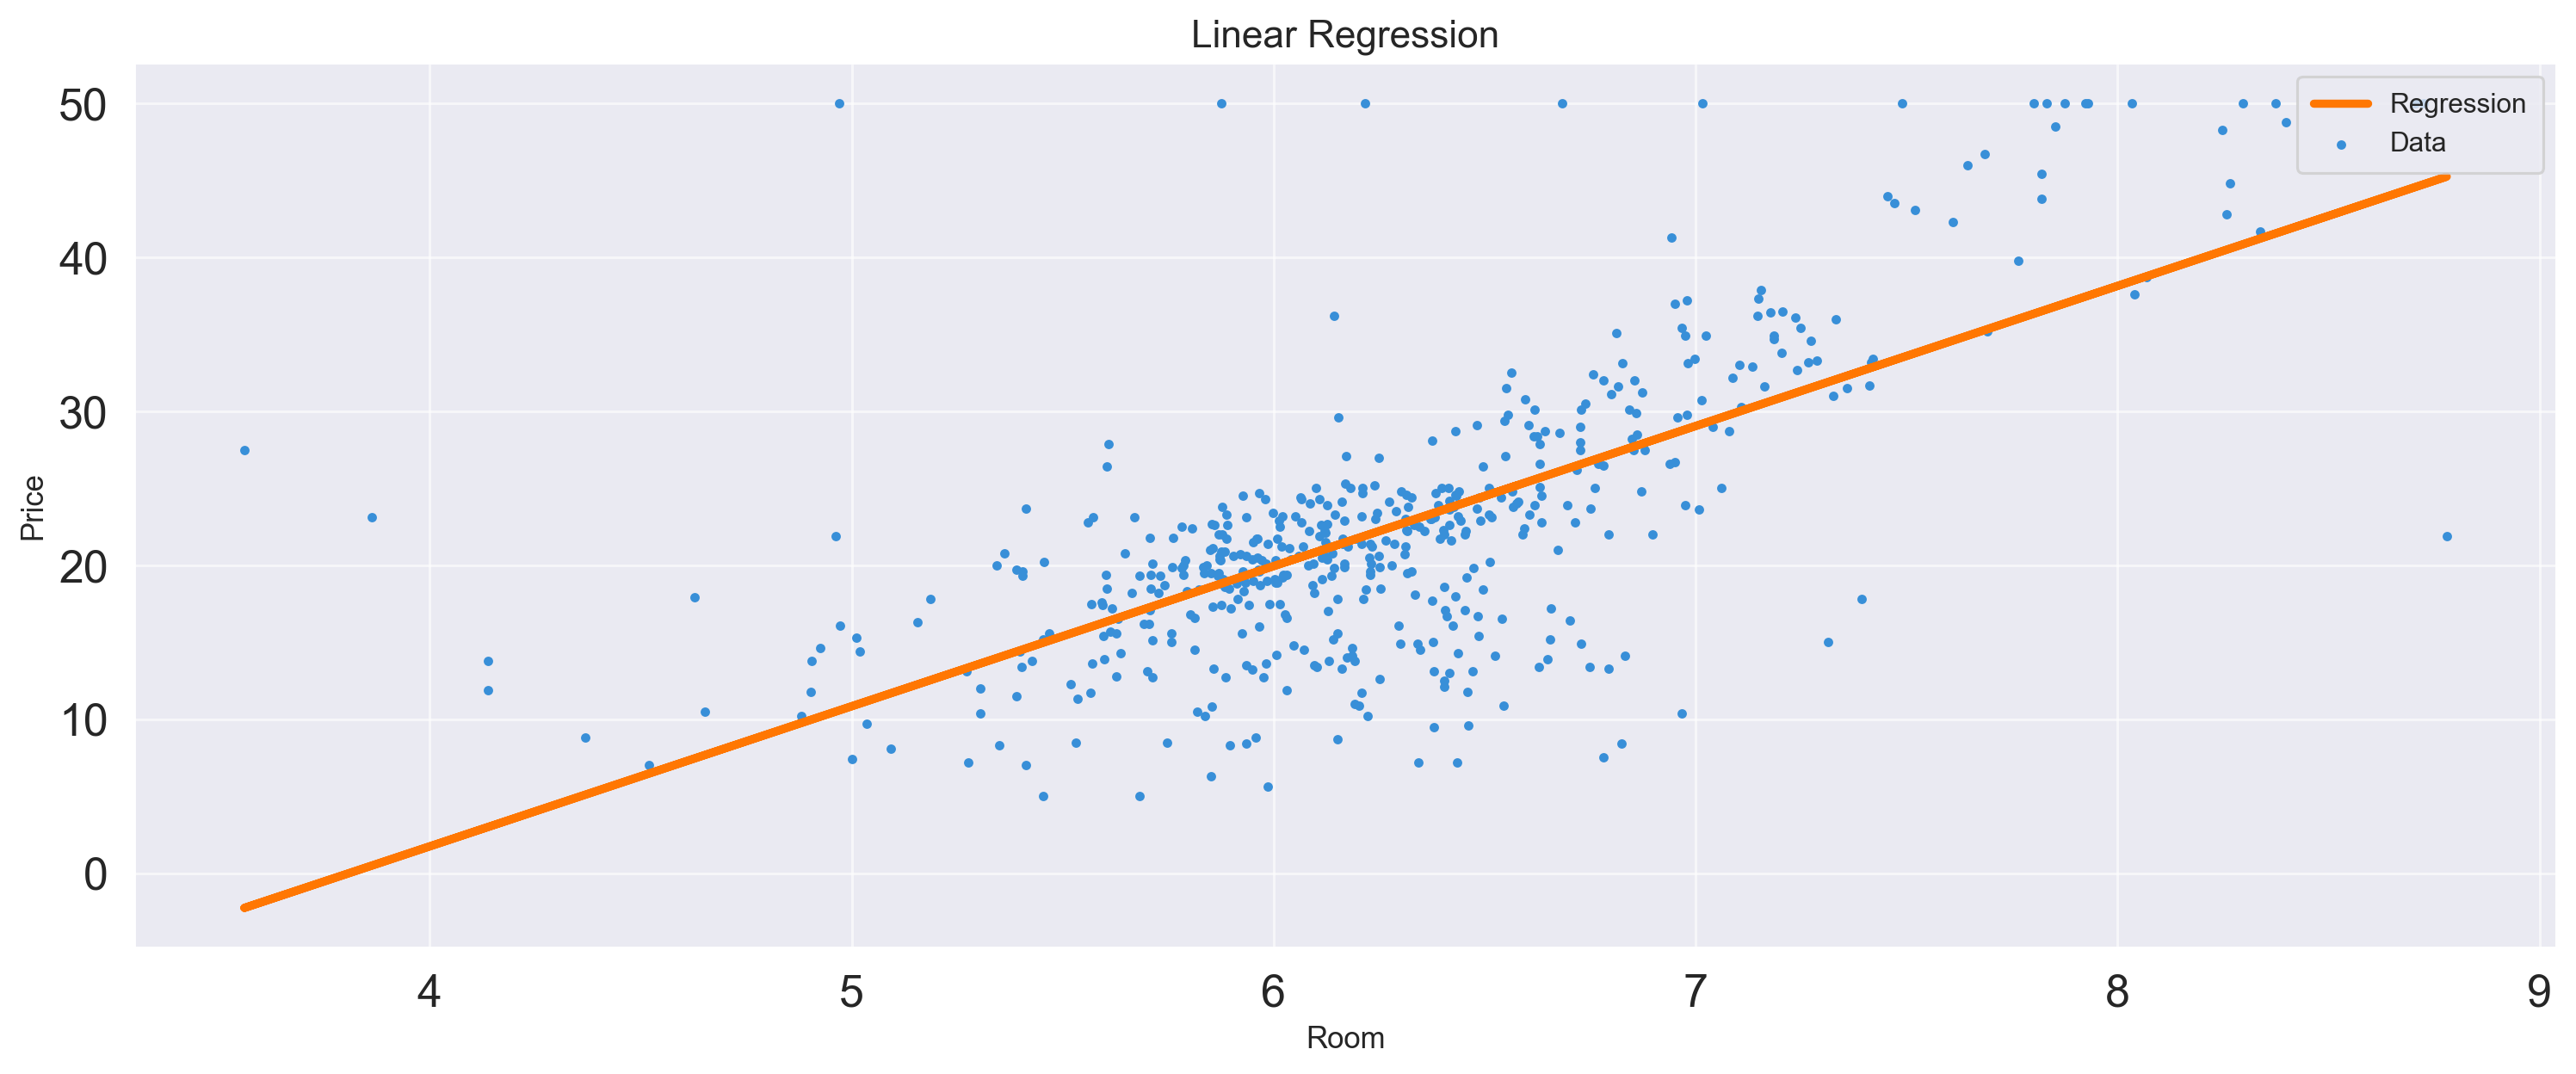

In [103]:
print("MSE:",mean_squared_error(y, y_pred))
plot_regression(X, y, y_pred, title="Linear Regression")

# Gradient Descent

In [104]:
def gradient_descent(X, Y, lr=0.05, epoch=10):
    
    m, b = 0.2, 0.2 # parameters
    log, mse = [], [] # lists to store learning process
    N = len(X) # number of samples
    
    for _ in range(epoch):
                
        f = Y - (m*X + b)
    
        # Updating m and b
        m -= lr * (-2 * X.dot(f).sum() / N)
        b -= lr * (-2 * f.sum() / N)
        
        log.append((m, b))
        mse.append(mean_squared_error(Y, (m*X + b)))        
    
    return m, b, log, mse

MSE: 58.31147280877539


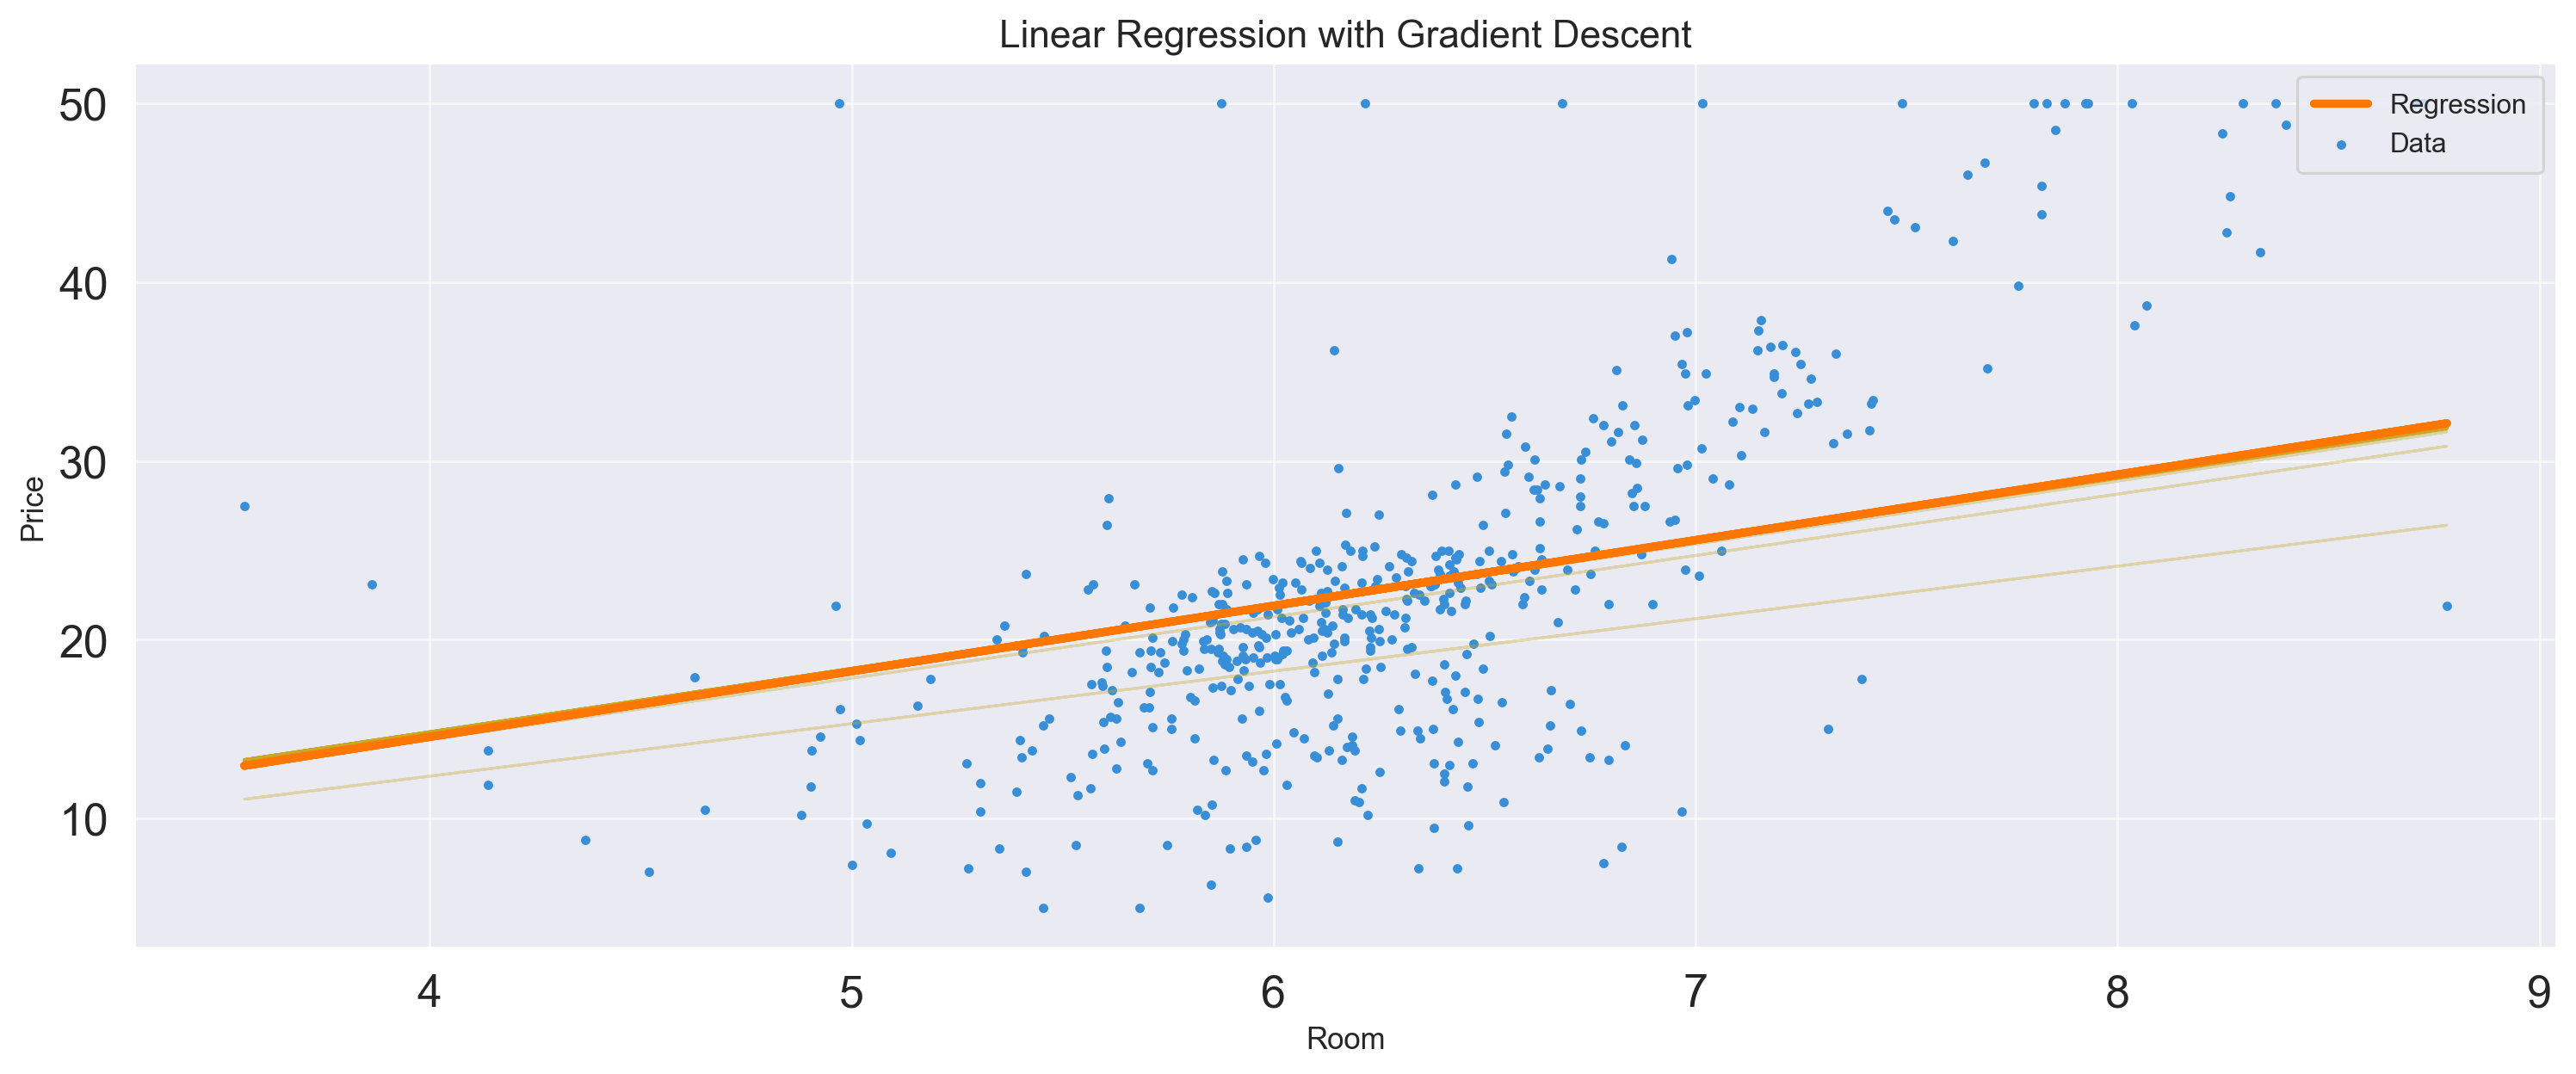

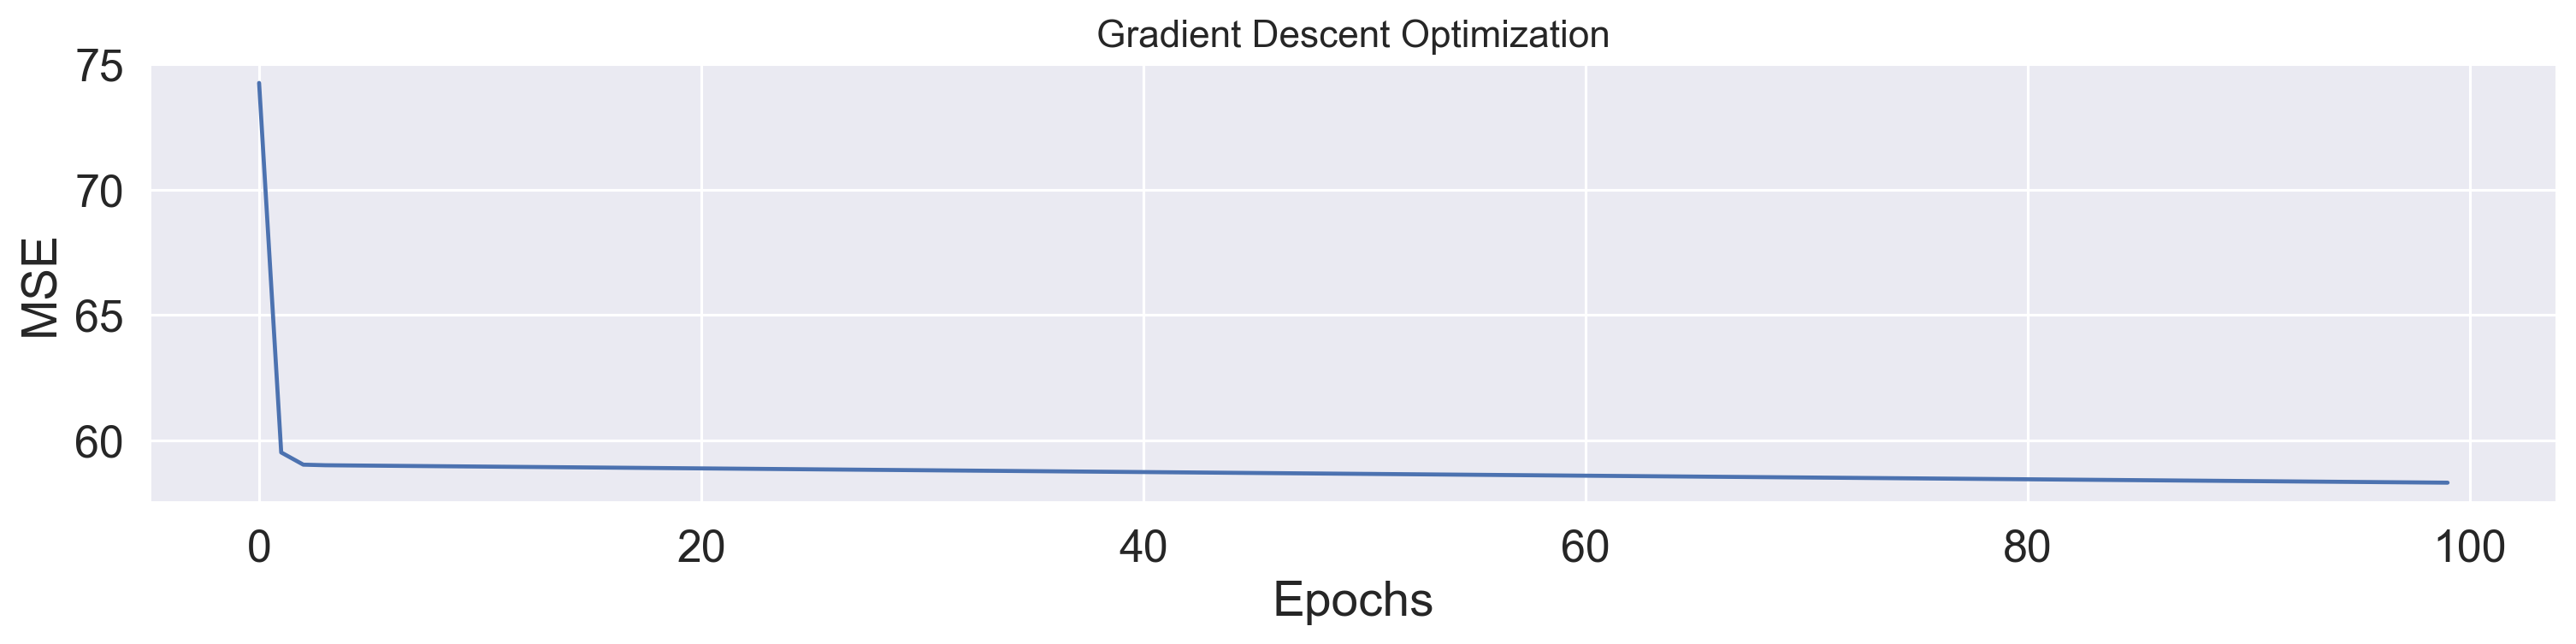

In [105]:
X = Data.RM
Y = Data.price

m, b, log, mse = gradient_descent(X, Y, lr=0.01, epoch=100)

y_pred = m*X + b

print("MSE:",mean_squared_error(y, y_pred))
plot_regression(X, Y, y_pred, log=log, title="Linear Regression with Gradient Descent")

plt.figure(figsize=(16,3))
plt.rcParams['figure.dpi'] = 227
plt.plot(range(len(mse)), mse)
plt.title('Gradient Descent Optimization', fontSize=14)
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()

# Stochastic Gradient Descent

In [106]:
def SGD(X, Y, lr=0.05, epoch=10, batch_size=1):
    
    m, b = 0.5, 0.5 # initial parameters
    log, mse = [], [] # lists to store learning process
    
    for _ in range(epoch):
        
        indexes = np.random.randint(0, len(X), batch_size) # random sample
        
        Xs = np.take(X, indexes)
        ys = np.take(Y, indexes)
        N = len(Xs)
        
        f = ys - (m*Xs + b)
        
        # Updating parameters m and b
        m -= lr * (-2 * Xs.dot(f).sum() / N)
        b -= lr * (-2 * f.sum() / N)
        
        log.append((m, b))
        mse.append(mean_squared_error(Y, m*X+b))        
    
    return m, b, log, mse

In [107]:
m, b, log, mse = SGD(X, Y, lr=0.01, epoch=100, batch_size=2)

MSE: 58.6195707122879


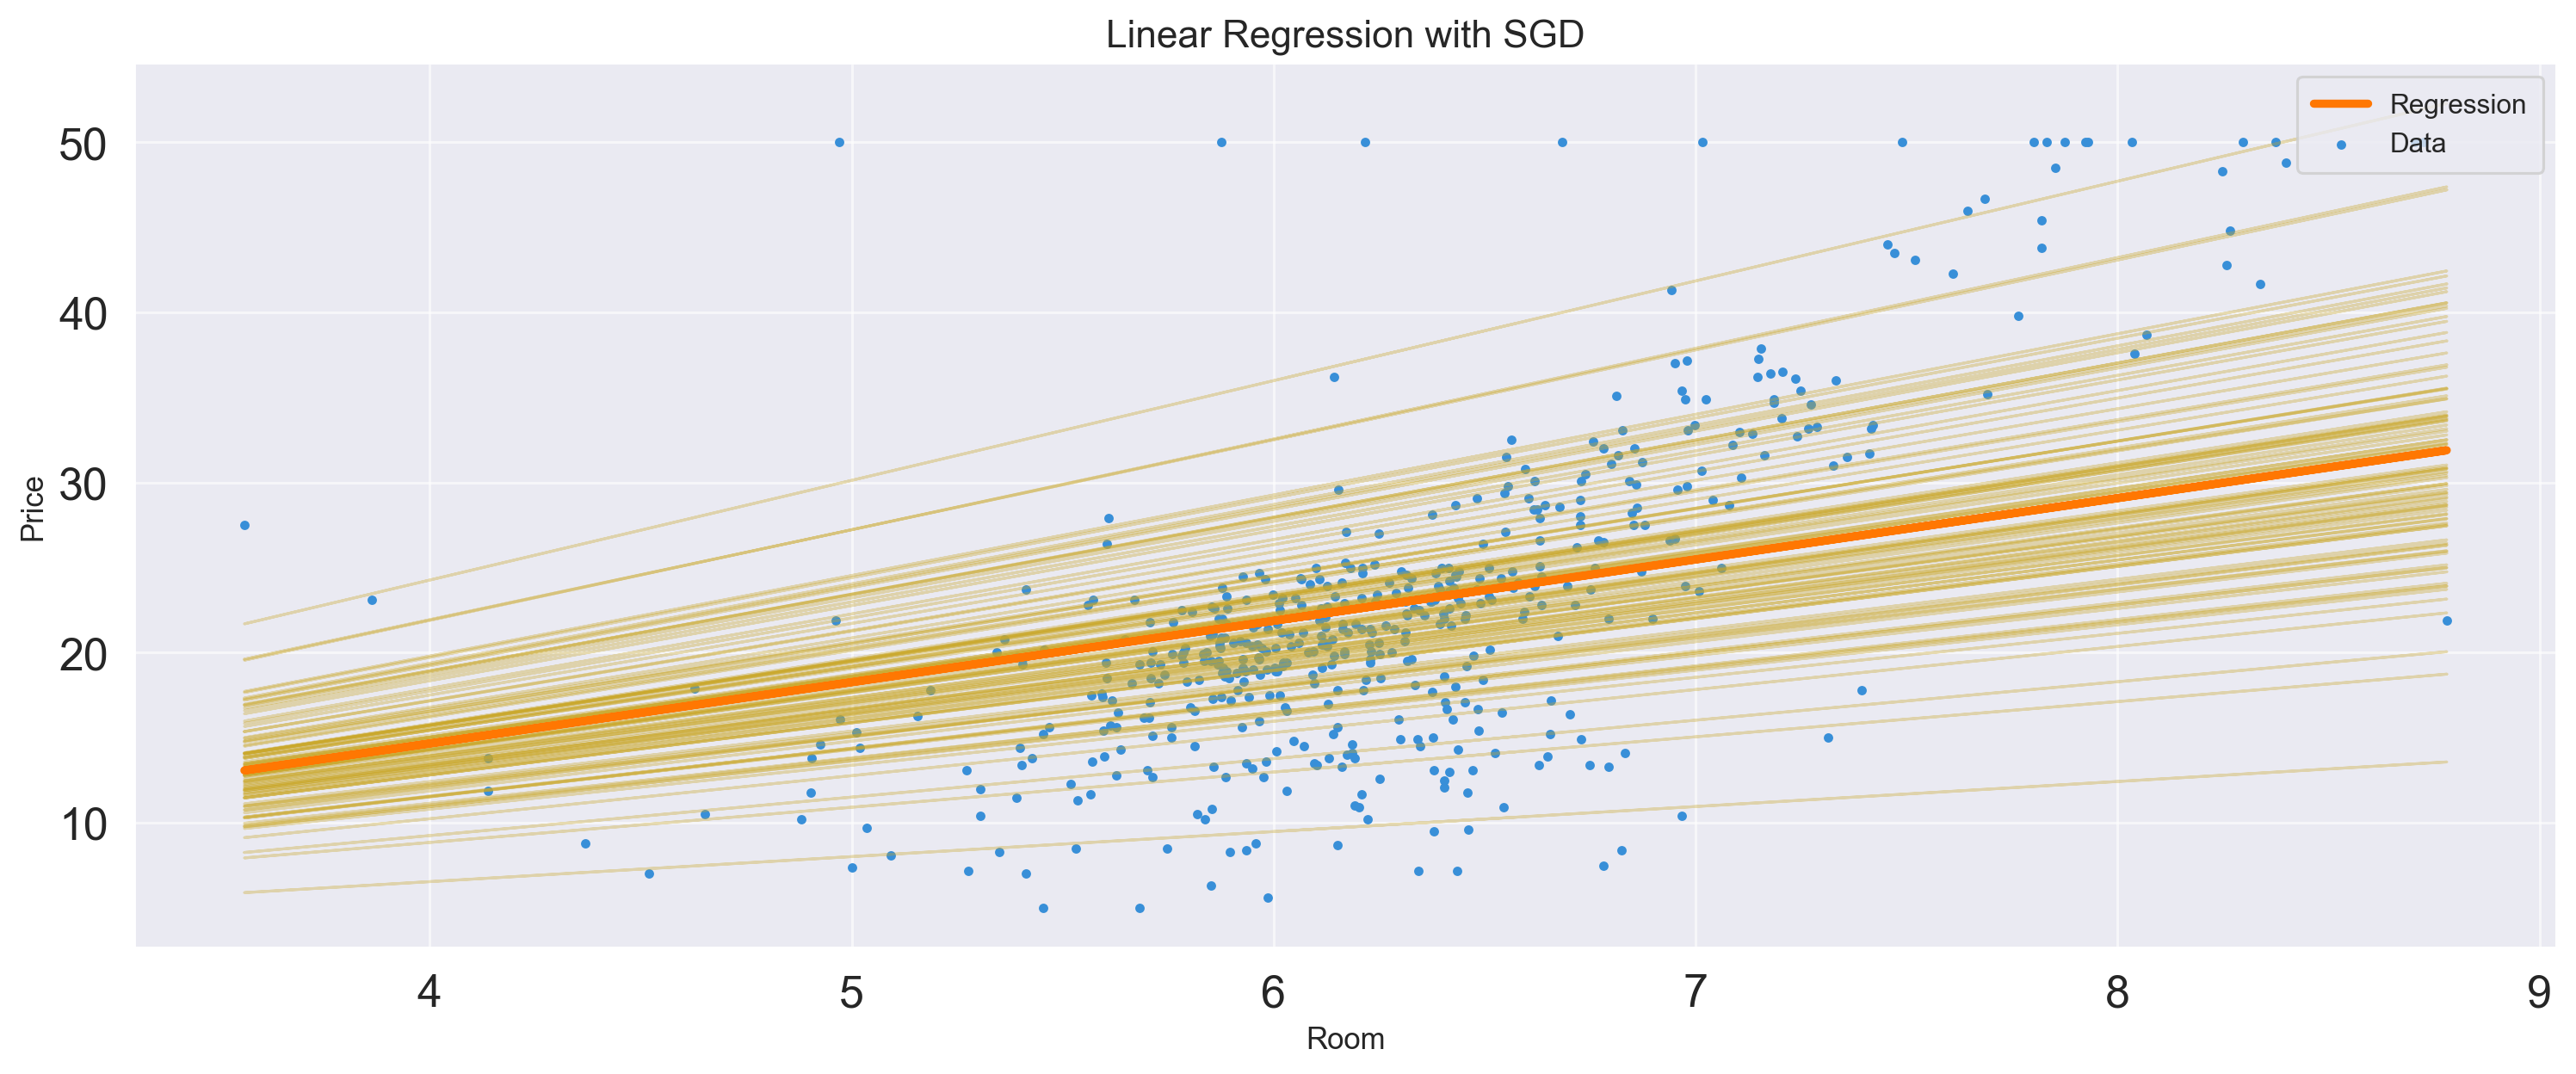

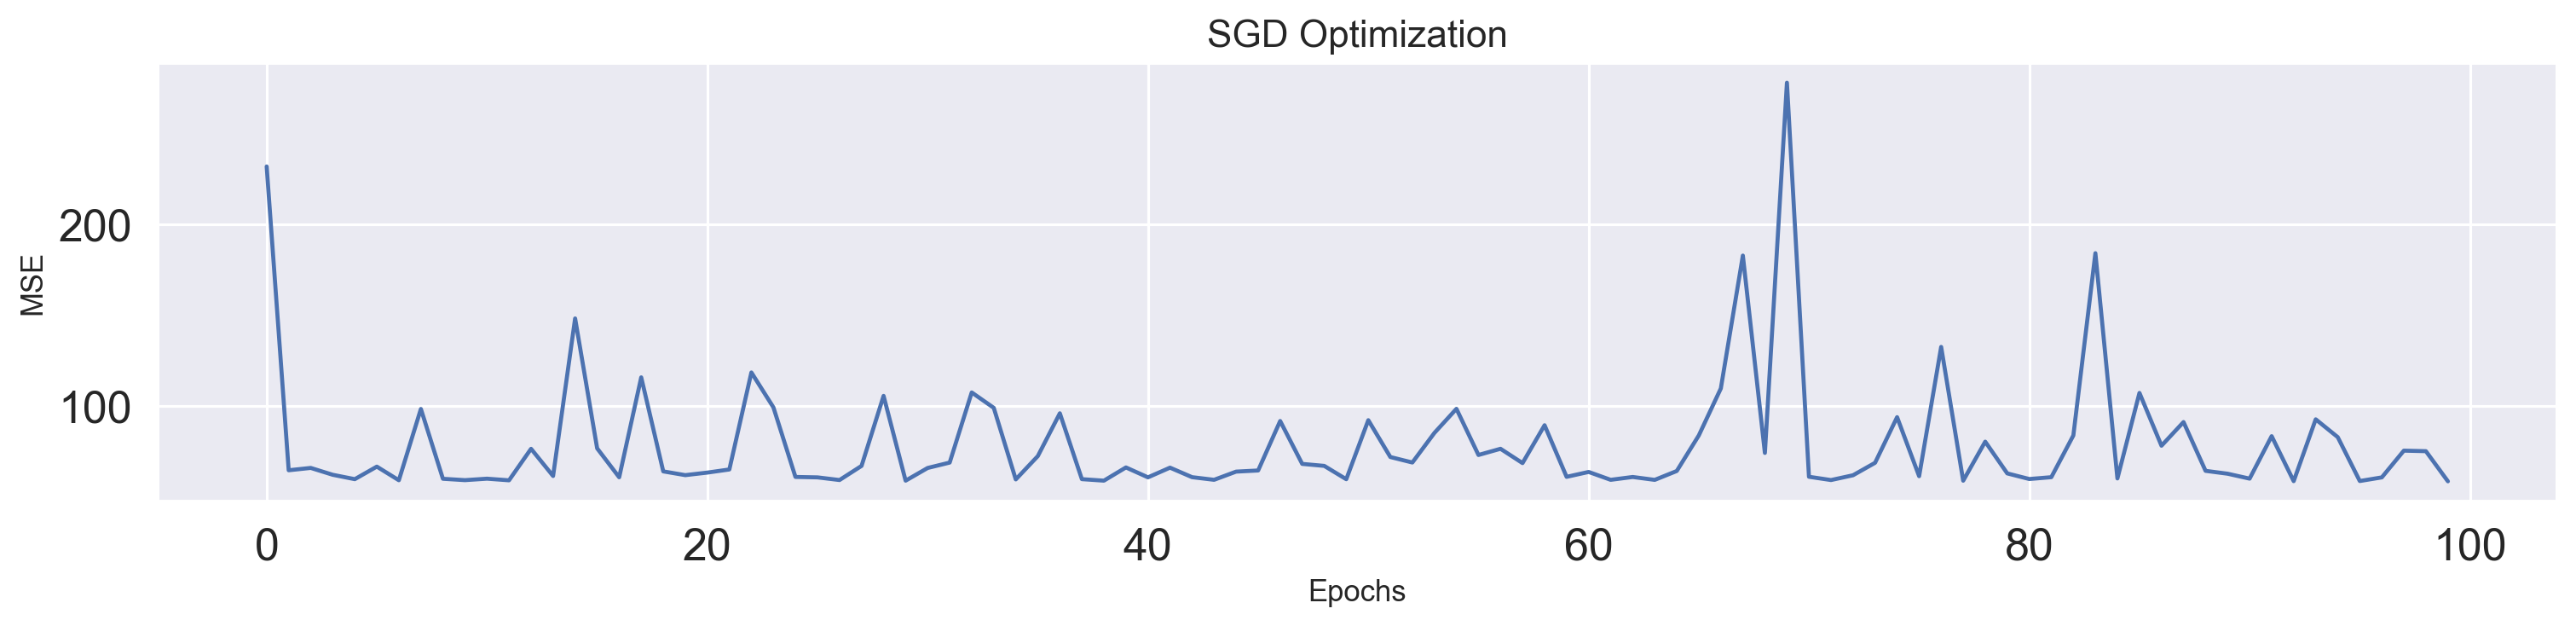

In [108]:
y_pred = m*X + b

print("MSE:",mean_squared_error(y, y_pred))
plot_regression(X, Y, y_pred, log=log, title="Linear Regression with SGD")

plt.figure(figsize=(16,3))
plt.rcParams['figure.dpi'] = 227
plt.plot(range(len(mse)), mse)
plt.title('SGD Optimization', fontSize=14)
plt.xlabel('Epochs', fontSize=11)
plt.ylabel('MSE', fontSize=11)
plt.show()

# Speed Test for Gradient Descent vs SGD

In [109]:
X = Data.RM
Y = Data.price

In [110]:
X = np.concatenate((X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X))
Y = np.concatenate((y,y,y,y,y,y,y,y,y,y,y,y,y,y,y,y,y))

In [111]:
X.shape, Y.shape

((8602,), (8602,))

In [112]:
%timeit SGD(X, Y, lr=0.01, epoch=1000, batch_size=1)

258 ms ± 3.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [113]:
%timeit gradient_descent(X, Y, lr=0.01, epoch=1000)

308 ms ± 3.44 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
